In [545]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [546]:
#Read the data in the csv file
df = pd.read_csv("ipl.csv")

In [547]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [548]:
df.shape

(76014, 15)

In [549]:
#Identify if their are any null values so that we can replace it
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [550]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [551]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

## **Data Cleaning**
Points covered under this section:<br/>
*• Removing columns which are not required*<br/>
*• Keeping only consistent teams*<br/>
*• Removing the first 5 overs data in every match*<br/>
*• Converting the column 'date' from string into datetime object*<br/>

In [552]:
df.columns


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [553]:
#Remove columns which are not required
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print('Before removing unwanted columns: {}'.format(df.shape)) # printing unwanted columns
df.drop(labels=columns_to_remove, axis=1, inplace=True) #removing columns
print('After removing unwanted columns: {}'.format(df.shape))# showing the remaining columns

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [554]:
# Showing the remaining columns
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [555]:
#Looking for all the batting teams
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [556]:
Current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [557]:
#Keeping the teams which are currently playing IPL and removing all other
print("Before removing old teams : {}".format(df.shape))
df = df[(df['bat_team'].isin(Current_teams)) & (df['bowl_team'].isin(Current_teams))]
print('After removing old teams: {}'.format(df.shape))

Before removing old teams : (76014, 9)
After removing old teams: (53811, 9)


In [558]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [559]:
print("Before removing first 5 overs {}".format(df.shape))
df =df[df["overs"] >= 5]
print("After removing first 5 overs {}".format(df.shape))



Before removing first 5 overs (53811, 9)
After removing first 5 overs (40108, 9)


In [560]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [561]:
df.shape

(40108, 9)

In [562]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [563]:
df.columns


Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

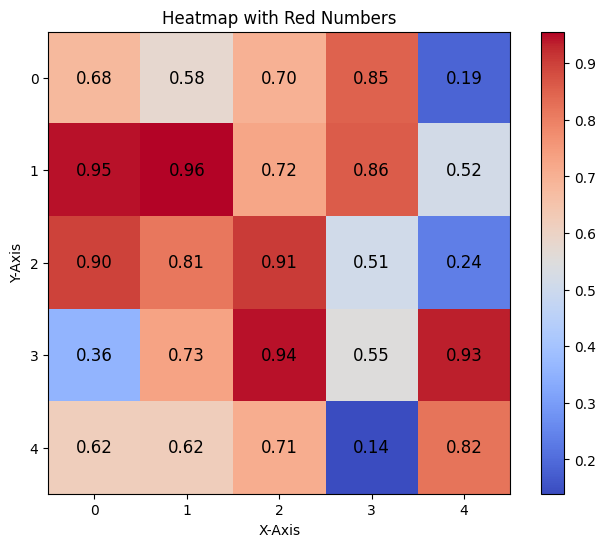

In [564]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample data array
data = np.random.rand(5, 5)

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='coolwarm')
plt.colorbar(heatmap)

# Add labels to the axes
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Add numbers on the heatmap with a custom color (e.g., red)
for i in range(data.shape[False]):
    for j in range(data.shape[1]):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', fontsize=12)

# Add a title
plt.title('Heatmap with Red Numbers')

# Show the plot
plt.show()


## **Data Preprocessing**
*• Handling categorical features*<br/>
*• Splitting dataset*<br/>

In [565]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [566]:
# Converting categorical features using OneHotEncoding method
encoded = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [567]:
encoded.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [568]:
# Rearranging the columns
# Converting all strings to bool or 0, 1 value
encoded = encoded[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [569]:
encoded

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.1,61,0,59,0,222
33,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.2,61,1,59,1,222
34,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.3,61,1,59,1,222
35,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.4,61,1,59,1,222
36,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.1,106,9,29,4,107
75885,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.2,107,9,29,4,107
75886,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.3,107,9,28,4,107
75887,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.4,107,9,24,4,107


In [570]:
# Splitting the data into train and test set
X_train = encoded.drop(labels='total', axis=1)[encoded['date'].dt.year <= 2016]
X_test = encoded.drop(labels='total', axis=1)[encoded['date'].dt.year >= 2017]

y_train = encoded[encoded['date'].dt.year <= 2016]['total'].values
y_test = encoded[encoded['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [571]:
X_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.1,61,0,59,0
33,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.2,61,1,59,1
34,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.3,61,1,59,1
35,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.4,61,1,59,1
36,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.2,194,7,54,4
68858,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.3,200,7,56,4
68859,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.4,201,7,56,4
68860,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.5,202,7,57,4


## **Model Building**
I will experiment with 5 different algorithms, they are as follows:<br/>
*• Linear Regression*<br/>
*• Decision Tree Regression*<br/>
*• Random Forest Regression*<br/>

In [641]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [642]:
# prediction the result
y_pred_lr = linear_regression.predict(X_test)

In [643]:
y_pred_lr

array([171.70654297, 174.85498047, 174.25195312, ..., 100.55810547,
        99.98974609,  93.32714844])

In [644]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression Model Evaluation ----
Mean Absolute Error (MAE): 12.149460816572175
Mean Squared Error (MSE): 250.75134144900426
Root Mean Squared Error (RMSE): 15.835129978910949


Random Forest

In [595]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [596]:
y_pred_rf = random_forest.predict(X_test)

In [597]:
# Rnadom forest Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Random Forest Regression Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression Model Evaluation ----
Mean Absolute Error (MAE): 13.779061975041998
Mean Squared Error (MSE): 331.6341722422706
Root Mean Squared Error (RMSE): 18.21082568809747


Decision Tree


In [598]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [599]:
y_pred_dt = decision_tree.predict(X_test)

In [600]:
y_pred_dt

array([194., 194., 194., ..., 119., 112., 112.])

In [601]:
# Decision tree Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Decision Tree Regression Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression Model Evaluation ----
Mean Absolute Error (MAE): 17.008279337652986
Mean Squared Error (MSE): 519.3214542836573
Root Mean Squared Error (RMSE): 22.788625546172312


<B>Hence By above three models we can say that the 
Linear Regression has the least error hence we will select the linear regression model to 
predict the score of the team </B>

<h1>PREDICTION</h1>

In [605]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs= 50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [True,False,False,False,False,False,False,False]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [False,True,False,False,False,False,False,False]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [False,False,True,False,False,False,False,False]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [False,False,False,True,False,False,False,False]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [False,False,False,False,True,False,False,False]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [False,False,False,False,False,True,False,False]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [False,False,False,False,False,False,True,False]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [False,False,False,False,False,False,False,True]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [True,False,False,False,False,False,False,False]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [False,True,False,False,False,False,False,False]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [False,False,True,False,False,False,False,False]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [False,False,False,True,False,False,False,False]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [False,False,False,False,True,False,False,False]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [False,False,False,False,False,True,False,False]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [False,False,False,False,False,False,True,False]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [False,False,False,False,False,False,False,True]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regression.predict(temp_array)[False])

In [607]:

# encoded.iloc[:, [3, 15]] = encoded.iloc[:, [3, 15]].astype(int)

### **Prediction 1**
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [633]:
import numpy as np
from sklearn.linear_model import LinearRegression

def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5):
    # Create and fit a LinearRegression model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    # Prepare input data for prediction
    input_data = np.array([[overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]])

    # Make a prediction
    predicted_score = linear_regression.predict(X_test)
    return int(predicted_score[0])
# Example usage:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score - 10, final_score + 5))


The final predicted score (range): 161 to 176


### **Prediction 2**
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>


In [637]:
import numpy as np
from sklearn.linear_model import LinearRegression

def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5):
    # Create and fit a LinearRegression model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    # Prepare input data for prediction
    input_data = np.array([[overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]])

    # Make a prediction
    predicted_score = linear_regression.predict(X_test)
    return int(predicted_score[final_score])
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+10))

The final predicted score (range): 168 to 188


### **Prediction 3**
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9


In [640]:
import numpy as np
from sklearn.linear_model import LinearRegression

def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5):
    # Create and fit a LinearRegression model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    # Prepare input data for prediction
    input_data = np.array([[overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]])

    # Make a prediction
    predicted_score = linear_regression.predict(X_test)
    return int(predicted_score[final_score])

final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+10))

The final predicted score (range): 152 to 172


<h3>Hence it is very difficult to predict an accurate value as the game can change at any time which is highly unpredictable</h3>